# Prediksi Efisiensi Bahan Bakar (MPG) Berdasarkan Berat Mobil

Proyek ini menggunakan regresi linear sederhana untuk menganalisis hubungan antara berat mobil (X) dan efisiensi bahan bakar atau MPG (y)

# import library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# memuat dan membersihkan dataset

In [18]:
# Nama file dataset yang umum digunakan untuk kasus ini
file_path = "auto-mpg.csv"
df = pd.read_csv(file_path)

# Dataset ini menggunakan '?' untuk nilai yang hilang, kita ganti dengan NaN
df.replace('?', np.nan, inplace=True)

# Hapus baris yang memiliki nilai NaN
df.dropna(inplace=True)

# Pastikan tipe data horsepower adalah numerik setelah membersihkan '?'
df['horsepower'] = pd.to_numeric(df['horsepower'])


# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama setelah dibersihkan ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)

=== 5 Baris Pertama setelah dibersihkan ===
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

=== Nama Kolom ===
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


# Cek informasi dataset

In [19]:
# Melihat tipe data dan informasi umum
print("=== Info Dataset ===")
df.info()

# Cek kembali jumlah data hilang (seharusnya sudah 0)
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB

=== Jumlah Missing Values ===
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


# Variabel independen (x) dan dependen (y)

In [20]:
# Variabel independen (X) adalah 'weight' (berat mobil)
X = df[['weight']]

# Variabel dependen (y) adalah 'mpg' (miles per gallon)
y = df['mpg']

print("Contoh nilai X (Berat Mobil):\n", X.head())
print("\nContoh nilai y (Efisiensi BBM - MPG):\n", y.head())

Contoh nilai X (Berat Mobil):
    weight
0    3504
1    3693
2    3436
3    3433
4    3449

Contoh nilai y (Efisiensi BBM - MPG):
 0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


# Scatterplot untuk melihat hubungan x dan y

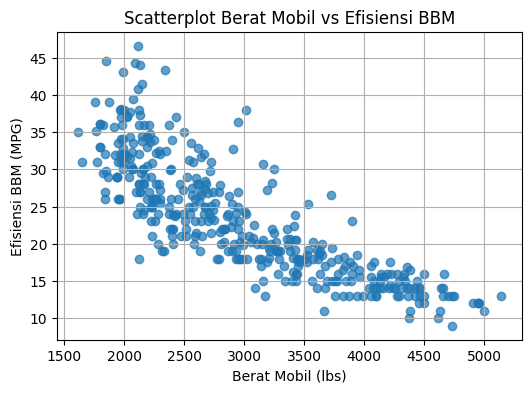

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.7)
plt.xlabel("Berat Mobil (lbs)")
plt.ylabel("Efisiensi BBM (MPG)")
plt.title("Scatterplot Berat Mobil vs Efisiensi BBM")
plt.grid(True)
plt.show()

Dari plot tersebut, Anda akan melihat hubungan linear negatif: semakin berat mobil, semakin rendah efisiensinya

# Split Data (Train & Test)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 313
Jumlah data test: 79


# Training Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
print(f"Intercept (nilai MPG saat berat mobil = 0)  : {model.intercept_:.4f}")
print(f"Koefisien (perubahan MPG per pon berat)     : {model.coef_[0]:.4f}")

Model berhasil dilatih.
Intercept (nilai MPG saat berat mobil = 0)  : 47.2005
Koefisien (perubahan MPG per pon berat)     : -0.0079


# Evaluasi Model

In [24]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print(f"R-squared : {r2:.4f}")
print(f"RMSE      : {rmse:.4f}")

=== Evaluasi Model ===
R-squared : 0.6533
RMSE      : 4.2064


# Visualisasi Garis Regresi

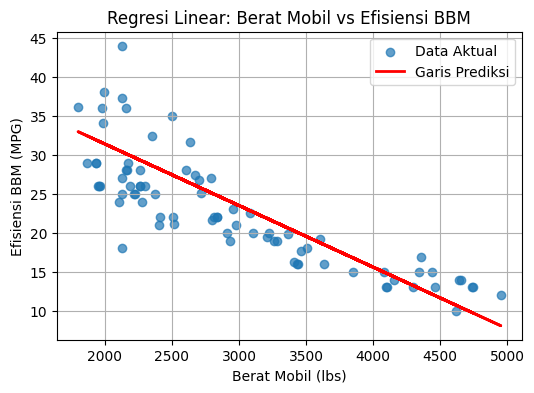

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual", alpha=0.7)
plt.plot(X_test, y_pred, color="red", label="Garis Prediksi", linewidth=2)
plt.xlabel("Berat Mobil (lbs)")
plt.ylabel("Efisiensi BBM (MPG)")
plt.title("Regresi Linear: Berat Mobil vs Efisiensi BBM")
plt.legend()
plt.grid(True)
plt.show()

# Simpan Model

In [26]:
joblib.dump(model, "model_mpg_berat.pkl")
print("Model disimpan sebagai model_mpg_berat.pkl")

Model disimpan sebagai model_mpg_berat.pkl


# Histogram Distribusi Efisiensi BBM (y)

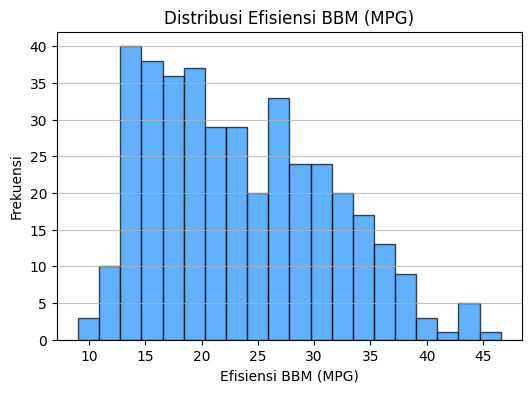

In [29]:
# Histogram Distribusi Efisiensi BBM (Y)
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7, color='dodgerblue')
plt.title("Distribusi Efisiensi BBM (MPG)")
plt.xlabel("Efisiensi BBM (MPG)")
plt.ylabel("Frekuensi")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram Distribusi berat mobil

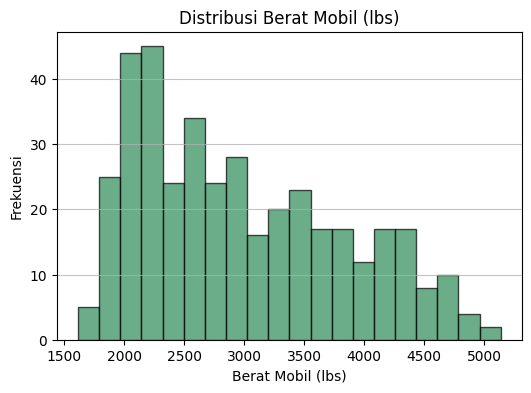

In [30]:
# Histogram Distribusi Berat Mobil (X)
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7, color='seagreen')
plt.title("Distribusi Berat Mobil (lbs)")
plt.xlabel("Berat Mobil (lbs)")
plt.ylabel("Frekuensi")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Residual Plot

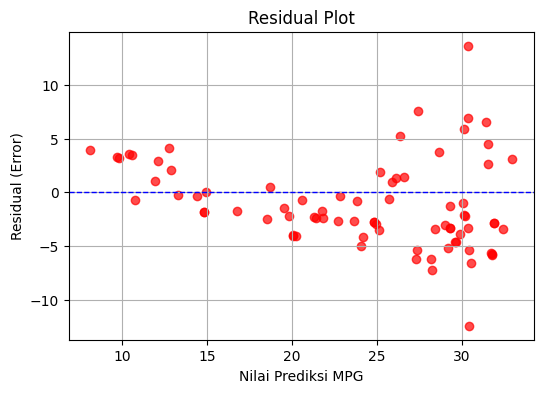

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")
plt.axhline(0, color="blue", linestyle="--", linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Nilai Prediksi MPG")
plt.ylabel("Residual (Error)")
plt.grid(True)
plt.show()

# Heatmap Korelasi

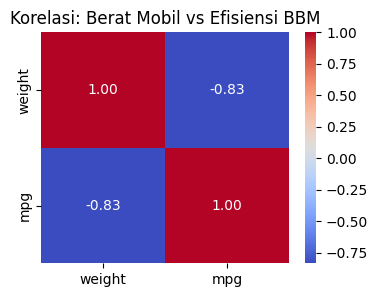

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom 'weight' (X) dan 'mpg' (Y) untuk korelasi
correlation_df = df[['weight', 'mpg']]

# Ukuran plot bisa dikecilkan karena matriksnya lebih simpel
plt.figure(figsize=(4, 3)) 
sns.heatmap(correlation_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi: Berat Mobil vs Efisiensi BBM")
plt.show()